**CLASIFICACIÓN DE SELLERS**
_______________________________
Daniela Castillo



**PROBLEMA A SOLUCIONAR**

El equipo comercial quiere realizar estrategias focalizadas para los sellers, pero en este momento no existe una clasificación que permita identificar a aquellos que tienen un buen perfil y son relevantes para el negocio. ¿Cómo podrías ayudar al equipo comercial a identificar estos sellers?

**SOLUCION AL PROBLEMA**

Al hablarse de un tema de clasificación sin previas etiquetas, se tendrán en cuenta algoritmos de aprendizaje no supervisado debido a que es un objetivo de agrupamiento, clustering o tambien conocido como segmentacion.

Se realizan 3 versiones de k means con diferentes combinaciones de variables.

**PASOS A SEGUIR**

El análisis correspondiente inicia con la extracción, exploración y clasificación por k-means de los datos. Finalmente, se muestran los resultados obtenidos con sugerencias para mejorar la clasificación y que esta sea más exacta.

**1. EXTRACCION DE DATOS**

In [ ]:
# LIBRERIAS A UTILIZAR
import requests as r #conexion meli
import pandas as pd
import numpy as np
import plotly.express as px


Se obtienen los nombres de las categorias de MELI Argentina


In [ ]:
url = "https://api.mercadolibre.com/sites/MLA/categories"
request = r.get(url)
results = request.json()
categorias = pd.DataFrame(results)
categorias

,id,name
0,MLA5725,Accesorios para Vehículos
1,MLA1512,Agro
2,MLA1403,Alimentos y Bebidas
3,MLA1071,Animales y Mascotas
4,MLA1367,Antigüedades y Colecciones
5,MLA1368,"Arte, Librería y Mercería"
6,MLA1743,"Autos, Motos y Otros"
7,MLA1384,Bebés
8,MLA1246,Belleza y Cuidado Personal
9,MLA1039,Cámaras y Accesorios


Para cada categoría se seleccionan los primeros 900 items por cada una


In [ ]:
offset_list = np.arange(0, 900, 50)

Se obtienen las varibles de interes para el estudio o que se consideran relevantes para clasfificar un seller.
No se tuvieron en cuenta variables relacionadas con temas de localizacion

In [8]:

base_items = pd.DataFrame()
i=0
for i in range(len(categorias)):

    categoria = categorias.id[i]
    
    print("categoria:", categoria)

    for offset in offset_list:

        url = f'https://api.mercadolibre.com/sites/MLA/search?category={categoria}&offset={offset}'

        req = r.get(url)

        items = req.json()['results']

        for item in range(len(items)):

            aux = pd.DataFrame({
                "id" : categoria,
                "seller" : items[item]['seller']['id'],
                "power_seller_status" :items[item]['seller']['seller_reputation']['power_seller_status'],
                "level_id" :items[item]['seller']['seller_reputation']['level_id'],
                "cancellations_value" :items[item]['seller']['seller_reputation']['metrics']['cancellations']['value'],
                "cancellations_rate" :items[item]['seller']['seller_reputation']['metrics']['cancellations']['rate'],
                "claims_value" :items[item]['seller']['seller_reputation']['metrics']['claims']['value'],
                "claims_rate" :items[item]['seller']['seller_reputation']['metrics']['claims']['rate'],
                "delayed_handling_time_value" :items[item]['seller']['seller_reputation']['metrics']['delayed_handling_time']['value'],
                "delayed_handling_time_rate" :items[item]['seller']['seller_reputation']['metrics']['delayed_handling_time']['rate'],
                "transactions_total_historic": items[item]['seller']['seller_reputation']['transactions']['total'],
                "transactions_canceled_historic": items[item]['seller']['seller_reputation']['transactions']['canceled'],
                "transactions_completed_historic": items[item]['seller']['seller_reputation']['transactions']['completed'],
                "rating_negative": items[item]['seller']['seller_reputation']['transactions']['ratings']['negative'],
                "rating_neutral": items[item]['seller']['seller_reputation']['transactions']['ratings']['neutral'],
                "rating_positive": items[item]['seller']['seller_reputation']['transactions']['ratings']['positive'],
                "price": items[item]['price'],
                "sold_quantity": items[item]['sold_quantity']
            }, index = {i})
            base_items = base_items.append(aux)
            i += 1
        print("finalizo offset:", offset)
print("finalizo categoria:", categoria)

categoria: MLA5725
finalizo offset: 0
finalizo offset: 50
finalizo offset: 100
finalizo offset: 150
finalizo offset: 200
finalizo offset: 250
finalizo offset: 300
finalizo offset: 350
finalizo offset: 400
finalizo offset: 450
finalizo offset: 500
finalizo offset: 550
finalizo offset: 600
finalizo offset: 650
finalizo offset: 700
finalizo offset: 750
finalizo offset: 800
finalizo offset: 850
categoria: MLA1512
finalizo offset: 0
finalizo offset: 50
finalizo offset: 100
finalizo offset: 150
finalizo offset: 200
finalizo offset: 250
finalizo offset: 300
finalizo offset: 350
finalizo offset: 400
finalizo offset: 450
finalizo offset: 500
finalizo offset: 550
finalizo offset: 600
finalizo offset: 650
finalizo offset: 700
finalizo offset: 750
finalizo offset: 800
finalizo offset: 850
categoria: MLA1403
finalizo offset: 0
finalizo offset: 50
finalizo offset: 100
finalizo offset: 150
finalizo offset: 200
finalizo offset: 250
finalizo offset: 300
finalizo offset: 350
finalizo offset: 400
finaliz

Se contabiliza cuantos items quedaron por categoria

In [9]:
base_items.value_counts('id')


id
MLA1000      900
MLA1403      900
MLA409431    900
MLA407134    900
MLA3937      900
MLA2547      900
MLA1953      900
MLA1743      900
MLA1648      900
MLA1540      900
MLA1500      900
MLA1459      900
MLA1430      900
MLA1499      900
MLA1384      900
MLA1368      900
MLA1071      900
MLA1132      900
MLA1168      900
MLA9304      900
MLA1182      899
MLA1512      899
MLA1051      899
MLA5726      899
MLA1276      898
MLA1574      898
MLA1246      898
MLA1367      898
MLA1039      898
MLA1144      897
MLA5725      897
MLA3025      885
dtype: int64

Se espera que se encuentren duplicados, por lo tanto no se tienen en cuenta en la base de datos

In [10]:
print('Tamaño base de datos full:',len(base_items))
base_items=base_items.drop_duplicates()
print('Tamaño base de datos sin duplicados:',len(base_items))
base_items.head(10)

Tamaño base de datos full: 28765
Tamaño base de datos sin duplicados: 27152


,id,seller,power_seller_status,level_id,cancellations_value,cancellations_rate,claims_value,claims_rate,delayed_handling_time_value,delayed_handling_time_rate,transactions_total_historic,transactions_canceled_historic,transactions_completed_historic,rating_negative,rating_neutral,rating_positive,price,sold_quantity
0,MLA5725,192261791,platinum,5_green,63,0.0097,83,0.0129,32,0.0055,34102,2652,31450,0.04,0.03,0.93,21854.07,732
1,MLA5725,435859328,platinum,5_green,1,0.0000,3,0.0008,54,0.0153,18757,913,17844,0.01,0.01,0.98,1399.0,500
2,MLA5725,435859328,platinum,5_green,1,0.0000,3,0.0008,54,0.0153,18757,913,17844,0.01,0.01,0.98,1199.0,500
3,MLA5725,415090258,platinum,5_green,8,0.0011,34,0.0047,86,0.0132,35955,1607,34348,0.01,0.02,0.97,3245.0,5000
5,MLA5725,51855129,platinum,5_green,74,0.0094,88,0.0112,156,0.0221,48870,3814,45056,0.03,0.03,0.94,3589.99,500
6,MLA5725,685241555,platinum,5_green,133,0.0047,504,0.0179,2045,0.0811,42846,3220,39626,0.09,0.04,0.87,3689.8,500
7,MLA5725,173563910,platinum,5_green,8,0.0005,98,0.0069,91,0.0066,86292,3790,82502,0.02,0.01,0.97,2999.99,5000
8,MLA5725,44012389,platinum,5_green,28,0.0055,34,0.0067,58,0.0119,21624,1721,19903,0.02,0.00,0.98,6269.05,500
9,MLA5725,170719433,platinum,5_green,1,0.0000,9,0.0089,24,0.0246,5005,269,4736,0.00,0.00,1.00,6100.0,500
10,MLA5725,139673546,platinum,5_green,60,0.0027,288,0.0131,269,0.0131,137569,7681,129888,0.02,0.02,0.96,6518.37,2


Se observa que se puede añadir una nueva variable calculada como el precio de venta total donde se multiplica la cantidad de cada item vendido por el precio de dicho item

In [11]:
base_items['total_ventas'] = base_items['price']*base_items['sold_quantity']

La base de datos se agrupa por seller y se suman variables numericas tales como el total de ventas calculado anteriormente y la cantidad de unidades vendidas.

In [12]:
metricas_final = base_items.groupby('seller',as_index=False).agg({'total_ventas': 'sum', 'sold_quantity':'sum'})
metricas_final.rename(columns={
                'total_ventas': 'total_ventas',
                'sold_quantity': 'sold_quantity'}, 
                        inplace=True)
metricas_final

,seller,total_ventas,sold_quantity
0,39092,82700.0,26
1,83182,0.0,500
2,101217,849000.0,10
3,102496,0.0,0
4,105065,590573.0,377
...,...,...,...
6942,1141065352,0.0,0
6943,1144617029,950.0,5
6944,1145776226,0.0,0
6945,1147459958,0.0,0


Esta transformación hace que no se tengan duplicados por seller y asi queden sellers únicos

In [13]:
base_final = base_items.drop_duplicates(subset='seller').reset_index(drop=True)
print("Cantidad de sellers: ", len(base_final))

Cantidad de sellers:  6947


In [14]:
base_final.drop(columns={'price','sold_quantity', 'total_ventas'},inplace=True)

In [15]:
base_final = base_final.merge(metricas_final)

In [16]:
# a la base se le une el nombre de las categorias 
base_final = base_final.merge(categorias)

In [17]:
base_final.head(10)

,id,seller,power_seller_status,level_id,cancellations_value,cancellations_rate,claims_value,claims_rate,delayed_handling_time_value,delayed_handling_time_rate,transactions_total_historic,transactions_canceled_historic,transactions_completed_historic,rating_negative,rating_neutral,rating_positive,total_ventas,sold_quantity,name
0,MLA5725,192261791,platinum,5_green,63,0.0097,83,0.0129,32,0.0055,34102,2652,31450,0.04,0.03,0.93,1.784643e+07,1732,Accesorios para Vehículos
1,MLA5725,435859328,platinum,5_green,1,0.0000,3,0.0008,54,0.0153,18757,913,17844,0.01,0.01,0.98,4.016550e+06,3450,Accesorios para Vehículos
2,MLA5725,415090258,platinum,5_green,8,0.0011,34,0.0047,86,0.0132,35955,1607,34348,0.01,0.02,0.97,2.742525e+07,12250,Accesorios para Vehículos
3,MLA5725,51855129,platinum,5_green,74,0.0094,88,0.0112,156,0.0221,48870,3814,45056,0.03,0.03,0.94,6.164822e+06,2617,Accesorios para Vehículos
4,MLA5725,685241555,platinum,5_green,133,0.0047,504,0.0179,2045,0.0811,42846,3220,39626,0.09,0.04,0.87,3.065790e+07,6250,Accesorios para Vehículos
5,MLA5725,173563910,platinum,5_green,8,0.0005,98,0.0069,91,0.0066,86292,3790,82502,0.02,0.01,0.97,5.607385e+07,16450,Accesorios para Vehículos
6,MLA5725,44012389,platinum,5_green,28,0.0055,34,0.0067,58,0.0119,21624,1721,19903,0.02,0.00,0.98,5.585025e+06,1000,Accesorios para Vehículos
7,MLA5725,170719433,platinum,5_green,1,0.0000,9,0.0089,24,0.0246,5005,269,4736,0.00,0.00,1.00,6.545000e+06,1000,Accesorios para Vehículos
8,MLA5725,139673546,platinum,5_green,60,0.0027,288,0.0131,269,0.0131,137569,7681,129888,0.02,0.02,0.96,3.385981e+08,26564,Accesorios para Vehículos
9,MLA5725,185702920,platinum,5_green,93,0.0048,339,0.0175,519,0.0295,89402,5987,83415,0.03,0.02,0.95,1.861660e+08,7618,Accesorios para Vehículos


**2 EXPLORACION DE DATOS**

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Dos variables de las analizadas tienen datos faltantes pero no en gran cantidad que llegue a afectar el resultado

In [20]:
base_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6947 entries, 0 to 6946
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               6947 non-null   object 
 1   seller                           6947 non-null   int64  
 2   power_seller_status              5248 non-null   object 
 3   level_id                         6395 non-null   object 
 4   cancellations_value              6947 non-null   int64  
 5   cancellations_rate               6947 non-null   float64
 6   claims_value                     6947 non-null   int64  
 7   claims_rate                      6947 non-null   float64
 8   delayed_handling_time_value      6947 non-null   int64  
 9   delayed_handling_time_rate       6947 non-null   float64
 10  transactions_total_historic      6947 non-null   int64  
 11  transactions_canceled_historic   6947 non-null   int64  
 12  transactions_complet

In [21]:
base_final.describe()

,seller,cancellations_value,cancellations_rate,claims_value,claims_rate,delayed_handling_time_value,delayed_handling_time_rate,transactions_total_historic,transactions_canceled_historic,transactions_completed_historic,rating_negative,rating_neutral,rating_positive,total_ventas,sold_quantity
count,6.947000e+03,6947.000000,6947.000000,6947.000000,6947.000000,6947.000000,6947.000000,6.947000e+03,6947.000000,6.947000e+03,6947.000000,6947.000000,6947.000000,6.947000e+03,6947.000000
mean,2.495238e+08,7.385922,0.001935,17.242119,0.004263,43.268893,0.020979,1.182226e+04,601.167410,1.122110e+04,0.016016,0.028258,0.920747,8.829632e+06,1806.436447
std,2.315695e+08,30.158102,0.007135,65.680636,0.008150,217.094389,0.031836,3.652016e+04,1999.124139,3.461636e+04,0.034502,0.122232,0.215782,8.254391e+07,9185.154757
min,3.909200e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,7.937331e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.340000e+02,15.000000,3.180000e+02,0.000000,0.000000,0.950000,3.375000e+04,8.000000
50%,1.802149e+08,1.000000,0.000000,2.000000,0.000000,5.000000,0.006700,2.847000e+03,131.000000,2.694000e+03,0.010000,0.010000,0.980000,6.800180e+05,200.000000
75%,3.364614e+08,4.000000,0.002000,12.000000,0.007500,26.000000,0.027500,1.063050e+04,513.000000,1.007850e+04,0.020000,0.020000,0.990000,3.638798e+06,750.000000
max,1.151381e+09,1160.000000,0.500000,2381.000000,0.500000,8917.000000,0.333300,1.304503e+06,70775.000000,1.233728e+06,1.000000,1.000000,1.000000,6.080743e+09,388921.000000


Las varibles con datos nulos son power_seller_status y level_id

In [22]:
base_final.isnull().sum()


id                                    0
seller                                0
power_seller_status                1699
level_id                            552
cancellations_value                   0
cancellations_rate                    0
claims_value                          0
claims_rate                           0
delayed_handling_time_value           0
delayed_handling_time_rate            0
transactions_total_historic           0
transactions_canceled_historic        0
transactions_completed_historic       0
rating_negative                       0
rating_neutral                        0
rating_positive                       0
total_ventas                          0
sold_quantity                         0
name                                  0
dtype: int64

Con la siguiente información se da a entender que las variables consideradas categóricas son power_seller_status con tres niveles,  level_id con 5 niveles y los ya conocidos 32 niveles de los nombres de las categorias

In [23]:
base_final.nunique(axis=0)


id                                   32
seller                             6947
power_seller_status                   3
level_id                              5
cancellations_value                 158
cancellations_rate                  223
claims_value                        252
claims_rate                         239
delayed_handling_time_value         409
delayed_handling_time_rate         1052
transactions_total_historic        4747
transactions_canceled_historic     1691
transactions_completed_historic    4718
rating_negative                      38
rating_neutral                       25
rating_positive                      42
total_ventas                       4935
sold_quantity                      1319
name                                 32
dtype: int64

In [24]:
fig = px.histogram(base_final, x="power_seller_status", 
                   title='Histograma Box plot de power_seller_status',
                   labels={'power_seller_status':'power_seller_status'},
                   opacity=0.8,
                   color_discrete_sequence=['green'],
                   marginal = 'box',
                   text_auto=True)
fig.update_layout(yaxis_title="Frecuencias por power_seller_status")
fig.show()

In [25]:
fig = px.histogram(base_final, x="level_id", 
                   title='Histograma Box plot de level_id',
                   labels={'level_id':'level_id'},
                   opacity=0.8,
                   color_discrete_sequence=['green'],
                   marginal = 'box',
                   text_auto=True)
fig.update_layout(yaxis_title="Frecuencias por level_id")
fig.show()



*   Cancelaciones: la base de datos parece estar balanceada en los que tienen y no tienen cancelaciones

In [26]:
no_cancelations = base_final.loc[base_final.cancellations_value == 0]
print('cantidad de sellers sin cancelaciones: ',len(no_cancelations))
print('porcentaje del total: ',round((len(no_cancelations)/len(base_final)*100)))

cantidad de sellers sin cancelaciones:  3276
porcentaje del total:  47


In [27]:
yes_cancelations = base_final.loc[base_final.cancellations_value != 0]
print('cantidad de sellers con cancelaciones: ',len(yes_cancelations))
print('porcentaje del total: ',round((len(yes_cancelations)/len(base_final)*100)))

cantidad de sellers con cancelaciones:  3671
porcentaje del total:  53


* Reclamos: una mayor parte del dataset presenta reclamaciones independiente de si han cancelado o no

In [28]:
no_claims = base_final.loc[base_final.claims_value == 0]
print('cantidad de sellers sin reclamos: ',len(no_claims))
print('porcentaje del total: ',round(len(no_claims)/len(base_final)*100))

cantidad de sellers sin reclamos:  2271
porcentaje del total:  33


In [29]:
yes_claims = base_final.loc[base_final.claims_value != 0]
print('cantidad de sellers con reclamos: ',len(yes_claims))
print('porcentaje del total: ',round((len(yes_claims)/len(base_final)*100)))

cantidad de sellers con reclamos:  4676
porcentaje del total:  67


* Demoras

In [30]:
yes_delay = base_final.loc[base_final.delayed_handling_time_value == 0]
print('cantidad de sellers sin demoras: ',len(yes_delay))
print('porcentaje del total: ',round((len(yes_delay)/len(base_final)*100)))


cantidad de sellers sin demoras:  2178
porcentaje del total:  31


In [31]:
no_delay = base_final.loc[base_final.delayed_handling_time_value != 0]
print('cantidad de sellers con demoras: ',len(no_delay))
print('porcentaje del total: ',round((len(no_delay)/len(base_final)*100)))


cantidad de sellers con demoras:  4769
porcentaje del total:  69


* Correlación de variables:

En este gráfico podemos evidenciar de mejor manera como las variables de cancelations_value estan muy relacionadas con el valor de los reclamos, los rating negativos, las transacciones canceladas y si presenta demoras.

Para la variable de claims_value tiene gran relacion con el numero de vendidos, transacciones, demoras y cancelaciones

Se pensaria que las variables de rate tanto en cancelaciones, demoras y retrazos llegarian a tener una correlacion significativa sobre las ventas pero no es así.

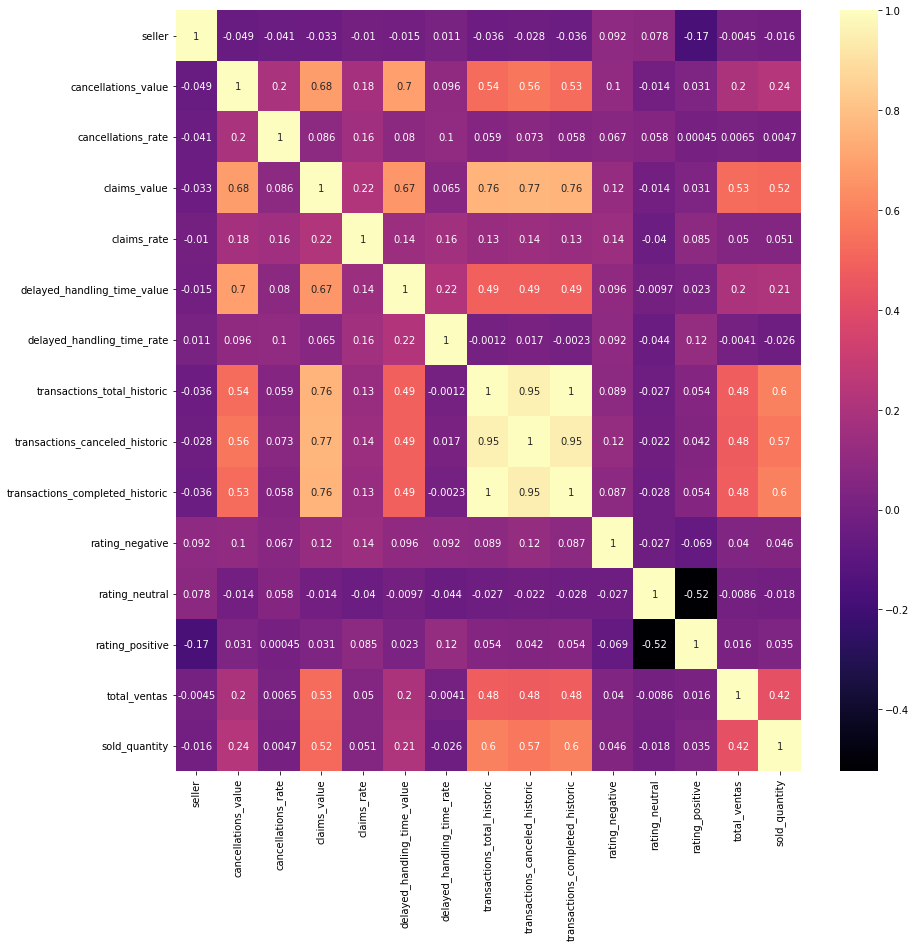

In [32]:
plt.figure(figsize=(14,14))
sns.heatmap(base_final.corr(),cbar=True,annot=True,cmap='magma')

**3 CLASIFICACION**




**CLASIFICACION K MEANS VERSION 1**

Para este primer caso se seleccionan todas las variables de estudio pero no se obtienen los resultados esperados dado que no se ve una gran distincion en los cluster y si se dejan mas de 6 cluster estos tendran poca reparticion respecto al total


In [33]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns

In [34]:
data = base_final[['cancellations_rate','claims_rate','delayed_handling_time_rate','cancellations_value','claims_value','delayed_handling_time_value','transactions_total_historic','transactions_canceled_historic','transactions_completed_historic','rating_negative','rating_neutral','rating_positive','total_ventas','sold_quantity']]
data = data.fillna(0)

In [35]:
data_kmeans = data[['cancellations_rate','claims_rate','delayed_handling_time_rate','cancellations_value','claims_value','delayed_handling_time_value','transactions_total_historic','transactions_canceled_historic','transactions_completed_historic','rating_negative','rating_neutral','rating_positive','total_ventas','sold_quantity']]

data_kmeans = data.fillna(0)

In [36]:
X = np.array(data)

Para determinar el número de clusteres ideal se realiza la curva de elbow la cual grafica la suma de cuadrados de cada cluster. El número de cluster que se eligen se determina a penas se empieza a suavizar la curva, en este caso es 4.

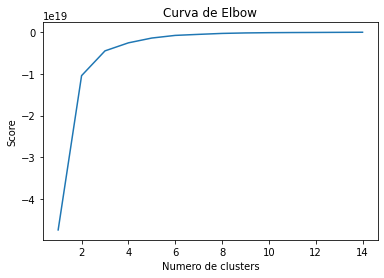

In [37]:
n_clu = range(1, 15)
kmeans = [KMeans(n_clusters=i) for i in n_clu]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
plt.plot(n_clu,score)
plt.title('Curva de Elbow')
plt.xlabel('Numero de clusters')
plt.ylabel('Score')
plt.show()

In [38]:
kmeans = KMeans(n_clusters=4,random_state=0).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)
labels = kmeans.labels_
print(labels)

[[1.92867935e-03 4.21368589e-03 2.09805317e-02 6.53973558e+00
  1.46306843e+01 3.83440360e+01 1.05018239e+04 5.29058695e+02
  9.97276522e+03 1.58840622e-02 2.83204998e-02 9.20491065e-01
  5.21036406e+06 1.40835072e+03]
 [0.00000000e+00 8.60000000e-03 0.00000000e+00 0.00000000e+00
  1.39200000e+03 0.00000000e+00 8.12390000e+05 4.28250000e+04
  7.69565000e+05 6.00000000e-02 1.00000000e-02 9.30000000e-01
  6.08074345e+09 1.17326000e+05]
 [1.76666667e-03 1.18000000e-02 2.05666667e-02 2.76000000e+02
  1.61500000e+03 2.49800000e+03 5.79601000e+05 3.68153333e+04
  5.42785667e+05 4.33333333e-02 2.00000000e-02 9.36666667e-01
  1.12911154e+09 2.22446667e+05]
 [2.68833333e-03 9.46500000e-03 2.11716667e-02 9.11500000e+01
  2.14016667e+02 4.86216667e+02 1.21567083e+05 6.35880000e+03
  1.15208283e+05 2.90000000e-02 2.18333333e-02 9.49166667e-01
  2.66807296e+08 3.45161667e+04]]
[0 0 0 ... 0 0 0]


In [39]:
data['kmeans'] = labels
base_final['kmeans'] = labels

Con las variables seleccionadas los grupos quedan repartidos de la siguiente manera, allí se evidencia como el grupo 0 corresponde al 99% de los datos lo cual no es ideal para hacer una distincion de sellers

In [40]:
g_kmeans = data.groupby('kmeans', as_index=False).size()
g_kmeans['porcentaje'] = round(g_kmeans['size']/len(data)*100,1)
g_kmeans

,kmeans,size,porcentaje
0,0,6883,99.1
1,1,1,0.0
2,2,3,0.0
3,3,60,0.9


El grupo 0 se caracteriza por recolectar info de todas las variables. El grupo 1 tiene valores de reclamos, transacciones, rating positivo,total de ventas y cantidades vendidas. 

In [41]:
data.loc[data.kmeans == 0].describe()


,cancellations_rate,claims_rate,delayed_handling_time_rate,cancellations_value,claims_value,delayed_handling_time_value,transactions_total_historic,transactions_canceled_historic,transactions_completed_historic,rating_negative,rating_neutral,rating_positive,total_ventas,sold_quantity,kmeans
count,6883.000000,6883.000000,6883.000000,6883.000000,6883.000000,6883.000000,6.883000e+03,6883.000000,6.883000e+03,6883.000000,6883.000000,6883.000000,6.883000e+03,6883.000000,6883.0
mean,0.001929,0.004214,0.020981,6.539736,14.630684,38.344036,1.050182e+04,529.058695,9.972765e+03,0.015884,0.028320,0.920491,5.210364e+06,1408.350719,0.0
std,0.007161,0.008155,0.031867,20.717772,42.105507,160.190285,2.859464e+04,1546.059799,2.715634e+04,0.034596,0.122793,0.216754,1.363612e+07,5612.056094,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.225000e+02,14.000000,3.050000e+02,0.000000,0.000000,0.960000,3.179550e+04,7.000000,0.0
50%,0.000000,0.000000,0.006700,1.000000,2.000000,5.000000,2.781000e+03,127.000000,2.625000e+03,0.010000,0.010000,0.980000,6.499500e+05,200.000000,0.0
75%,0.002000,0.007400,0.027500,4.000000,12.000000,25.000000,1.021900e+04,495.500000,9.707500e+03,0.020000,0.020000,0.990000,3.433750e+06,700.000000,0.0
max,0.500000,0.500000,0.333300,480.000000,998.000000,7391.000000,1.304503e+06,70775.000000,1.233728e+06,1.000000,1.000000,1.000000,1.334316e+08,185500.000000,0.0


In [42]:
data.loc[data.kmeans == 1].describe()


,cancellations_rate,claims_rate,delayed_handling_time_rate,cancellations_value,claims_value,delayed_handling_time_value,transactions_total_historic,transactions_canceled_historic,transactions_completed_historic,rating_negative,rating_neutral,rating_positive,total_ventas,sold_quantity,kmeans
count,1.0,1.0000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.000000e+00,1.0,1.0
mean,0.0,0.0086,0.0,0.0,1392.0,0.0,812390.0,42825.0,769565.0,0.06,0.01,0.93,6.080743e+09,117326.0,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0,0.0086,0.0,0.0,1392.0,0.0,812390.0,42825.0,769565.0,0.06,0.01,0.93,6.080743e+09,117326.0,1.0
25%,0.0,0.0086,0.0,0.0,1392.0,0.0,812390.0,42825.0,769565.0,0.06,0.01,0.93,6.080743e+09,117326.0,1.0
50%,0.0,0.0086,0.0,0.0,1392.0,0.0,812390.0,42825.0,769565.0,0.06,0.01,0.93,6.080743e+09,117326.0,1.0
75%,0.0,0.0086,0.0,0.0,1392.0,0.0,812390.0,42825.0,769565.0,0.06,0.01,0.93,6.080743e+09,117326.0,1.0
max,0.0,0.0086,0.0,0.0,1392.0,0.0,812390.0,42825.0,769565.0,0.06,0.01,0.93,6.080743e+09,117326.0,1.0


In [43]:
data.loc[data.kmeans == 2].describe()


,cancellations_rate,claims_rate,delayed_handling_time_rate,cancellations_value,claims_value,delayed_handling_time_value,transactions_total_historic,transactions_canceled_historic,transactions_completed_historic,rating_negative,rating_neutral,rating_positive,total_ventas,sold_quantity,kmeans
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00,3.000000,3.000000e+00,3.000000,3.0
mean,0.001767,0.011800,0.020567,276.000000,1615.000000,2498.000000,579601.000000,36815.333333,542785.666667,0.043333,0.02,0.936667,1.129112e+09,222446.666667,2.0
std,0.002548,0.003305,0.025940,385.906724,1033.883939,3837.780739,366759.131524,17811.933790,349001.921607,0.005774,0.00,0.005774,4.916245e+08,152865.292615,0.0
min,0.000100,0.009600,0.000300,6.000000,439.000000,63.000000,203725.000000,19338.000000,184387.000000,0.040000,0.02,0.930000,7.452294e+08,88391.000000,2.0
25%,0.000300,0.009900,0.005950,55.000000,1232.000000,286.000000,401148.000000,27751.000000,373397.000000,0.040000,0.02,0.935000,8.520536e+08,139209.500000,2.0
50%,0.000500,0.010200,0.011600,104.000000,2025.000000,509.000000,598571.000000,36164.000000,562407.000000,0.040000,0.02,0.940000,9.588779e+08,190028.000000,2.0
75%,0.002600,0.012900,0.030700,411.000000,2203.000000,3715.500000,767539.000000,45554.000000,721985.000000,0.045000,0.02,0.940000,1.321053e+09,289474.500000,2.0
max,0.004700,0.015600,0.049800,718.000000,2381.000000,6922.000000,936507.000000,54944.000000,881563.000000,0.050000,0.02,0.940000,1.683227e+09,388921.000000,2.0


In [44]:
data.loc[data.kmeans == 3].describe()


,cancellations_rate,claims_rate,delayed_handling_time_rate,cancellations_value,claims_value,delayed_handling_time_value,transactions_total_historic,transactions_canceled_historic,transactions_completed_historic,rating_negative,rating_neutral,rating_positive,total_ventas,sold_quantity,kmeans
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,6.000000e+01,60.000000,60.0
mean,0.002688,0.009465,0.021172,91.150000,214.016667,486.216667,121567.083333,6358.800000,115208.283333,0.029000,0.021833,0.949167,2.668073e+08,34516.166667,3.0
std,0.003493,0.005511,0.028938,202.662517,250.670862,1243.907731,131822.528866,7050.701224,125021.492911,0.016945,0.011423,0.025062,1.198131e+08,40724.543673,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2201.000000,80.000000,2121.000000,0.000000,0.000000,0.900000,1.390535e+08,663.000000,3.0
25%,0.000000,0.004675,0.003875,1.000000,44.000000,26.000000,39661.500000,1848.750000,37445.250000,0.020000,0.010000,0.937500,1.725886e+08,8567.000000,3.0
50%,0.001300,0.010300,0.010150,18.500000,117.500000,140.000000,74917.000000,3833.500000,70705.000000,0.030000,0.020000,0.950000,2.341387e+08,21623.500000,3.0
75%,0.003875,0.014150,0.025125,74.500000,288.750000,410.500000,138623.000000,7097.500000,131265.250000,0.040000,0.030000,0.970000,3.227686e+08,41871.750000,3.0
max,0.013800,0.018800,0.119000,1160.000000,1142.000000,8917.000000,609423.000000,32287.000000,577136.000000,0.080000,0.060000,1.000000,5.453517e+08,223340.000000,3.0


In [45]:
silhouette_vals = silhouette_samples(X, labels)
silhouette_vals

array([0.9333135 , 0.9761307 , 0.89556648, ..., 0.98060653, 0.98048829,
       0.98066304])

Text(0.5, 1.02, 'Silhouette plot por cluster')

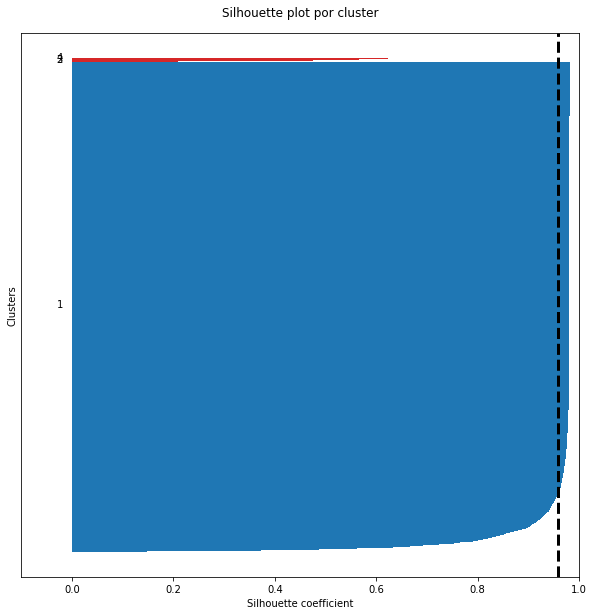

In [46]:
plt.rcParams['figure.figsize'] = (10,10)
rr = plt.axes()
# Silhouette plot
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels)):
    cluster_silhouette_vals = silhouette_vals[labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    rr.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=2)
    rr.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
    y_lower += len(cluster_silhouette_vals)

avg_score = np.mean(silhouette_vals)
rr.axvline(avg_score, linestyle='--', linewidth=3, color='black')
rr.set_yticks([])
rr.set_xlim([-0.1, 1])
rr.set_xlabel('Silhouette coefficient')
rr.set_ylabel('Clusters')
rr.set_title('Silhouette plot por cluster', y=1.02)

**CLASIFICACION K MEANS VERSION 2**

Para este segundo caso se seleccionan algunas de las variables excluyendo las de rate para asi obtener una discriminacion mas notoria en los cluster. Sin embargo, los cluster obtenidos no cambiaron mucho en la proporción segun la version 1.

In [154]:
data = base_final[['cancellations_value','claims_value','delayed_handling_time_value','transactions_total_historic','transactions_canceled_historic','transactions_completed_historic','rating_negative','rating_neutral','rating_positive','total_ventas','sold_quantity']]
data = data.fillna(0)

In [155]:
data_kmeans = data[['cancellations_value','claims_value','delayed_handling_time_value','transactions_total_historic','transactions_canceled_historic','transactions_completed_historic','rating_negative','rating_neutral','rating_positive','total_ventas','sold_quantity']]

data_kmeans = data.fillna(0)

In [156]:
X = np.array(data)

Para determinar el número de clusteres ideal se realiza la curva de elbow la cual grafica la suma de cuadrados de cada cluster. El número de cluster que se eligen se determina a penas se empieza a suavizar la curva, en este caso es 4.

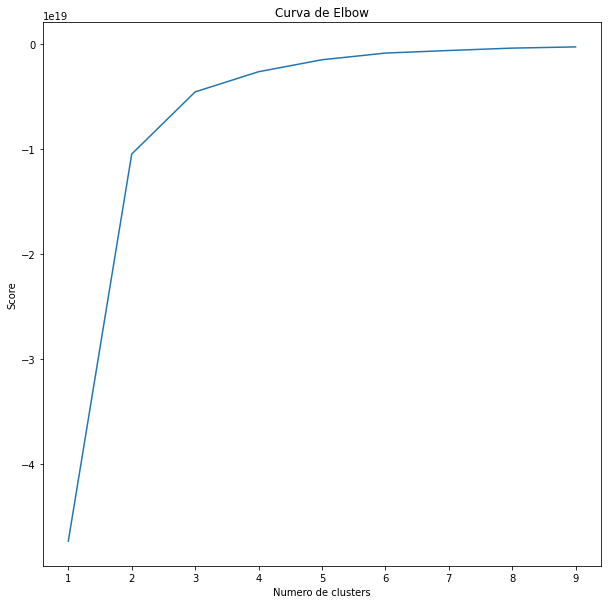

In [157]:
n_clu = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in n_clu]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
plt.plot(n_clu,score)
plt.title('Curva de Elbow')
plt.xlabel('Numero de clusters')
plt.ylabel('Score')
plt.show()

In [171]:
kmeans = KMeans(n_clusters=4,random_state=0).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)
labels = kmeans.labels_
print(labels)

[[6.53973558e+00 1.46306843e+01 3.83440360e+01 1.05018239e+04
  5.29058695e+02 9.97276522e+03 1.58840622e-02 2.83204998e-02
  9.20491065e-01 5.21036406e+06 1.40835072e+03]
 [0.00000000e+00 1.39200000e+03 0.00000000e+00 8.12390000e+05
  4.28250000e+04 7.69565000e+05 6.00000000e-02 1.00000000e-02
  9.30000000e-01 6.08074345e+09 1.17326000e+05]
 [2.76000000e+02 1.61500000e+03 2.49800000e+03 5.79601000e+05
  3.68153333e+04 5.42785667e+05 4.33333333e-02 2.00000000e-02
  9.36666667e-01 1.12911154e+09 2.22446667e+05]
 [9.11500000e+01 2.14016667e+02 4.86216667e+02 1.21567083e+05
  6.35880000e+03 1.15208283e+05 2.90000000e-02 2.18333333e-02
  9.49166667e-01 2.66807296e+08 3.45161667e+04]]
[0 0 0 ... 0 0 0]


In [172]:
data['kmeans'] = labels
base_final['kmeans'] = labels

In [173]:
g_kmeans = data.groupby('kmeans', as_index=False).size()
g_kmeans['porcentaje'] = round(g_kmeans['size']/len(data)*100,1)
g_kmeans

,kmeans,size,porcentaje
0,0,6883,99.1
1,1,1,0.0
2,2,3,0.0
3,3,60,0.9


In [174]:
silhouette_vals = silhouette_samples(X, labels)
silhouette_vals

array([0.9333135 , 0.9761307 , 0.89556648, ..., 0.98060653, 0.98048829,
       0.98066304])

Text(0.5, 1.02, 'Silhouette plot por cluster')

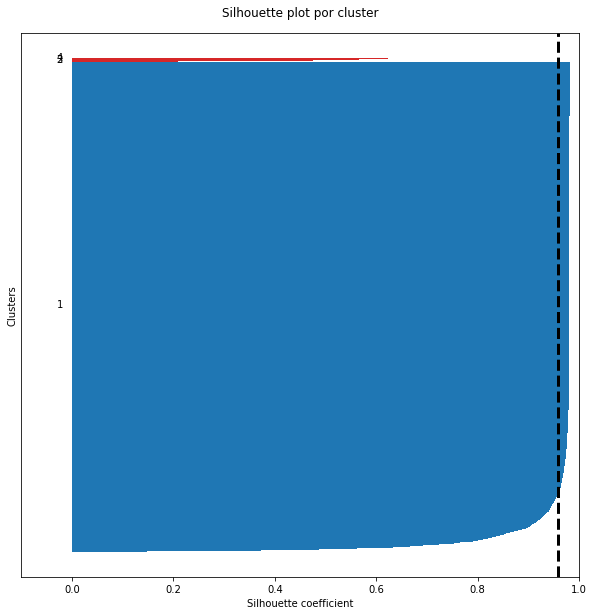

In [175]:
plt.rcParams['figure.figsize'] = (10,10)
rr = plt.axes()
# Silhouette plot
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels)):
    cluster_silhouette_vals = silhouette_vals[labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    rr.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=2)
    rr.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
    y_lower += len(cluster_silhouette_vals)

avg_score = np.mean(silhouette_vals)
rr.axvline(avg_score, linestyle='--', linewidth=3, color='black')
rr.set_yticks([])
rr.set_xlim([-0.1, 1])
rr.set_xlabel('Silhouette coefficient')
rr.set_ylabel('Clusters')
rr.set_title('Silhouette plot por cluster', y=1.02)

**CLASIFICACION K MEANS VERSION 3**


A pesar de que la correlación con los sellers no es tan alta con las variables de rate, con dichas variables si se muestran mejor repartidos los cluster donde el grupo 0 es el 72%, el grupo 1  el 8% y el grupo 2 es 19%.



In [139]:
data = base_final[['cancellations_rate','claims_rate','delayed_handling_time_rate']]
data = data.fillna(0)

In [141]:
data_kmeans = data[['cancellations_rate','claims_rate','delayed_handling_time_rate']]

data_kmeans = data.fillna(0)

In [143]:
X = np.array(data)

Para determinar el número de clusteres ideal se realiza la curva de elbow la cual grafica la suma de cuadrados de cada cluster. El número de cluster que se eligen se determina a penas se empieza a suavizar la curva, en este caso es 3.

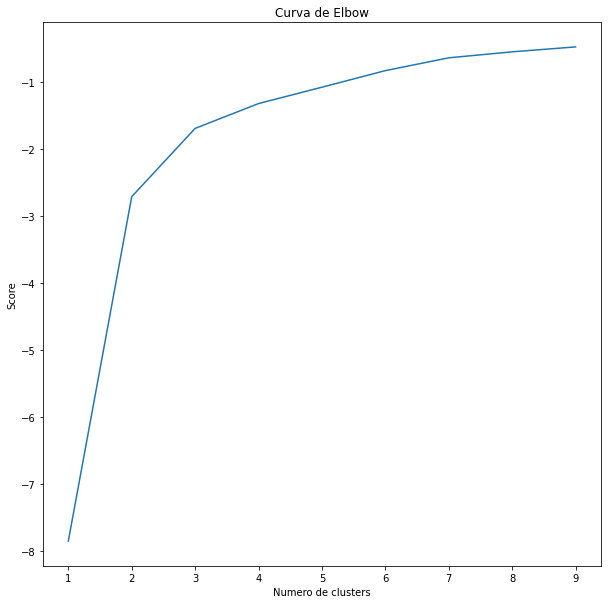

In [144]:
n_clu = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in n_clu]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
plt.plot(n_clu,score)
plt.title('Curva de Elbow')
plt.xlabel('Numero de clusters')
plt.ylabel('Score')
plt.show()

In [145]:
kmeans = KMeans(n_clusters=3,random_state=0).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)
labels = kmeans.labels_
print(labels)

[[0.00136324 0.00328755 0.00514668]
 [0.00335334 0.0066705  0.10602247]
 [0.00345323 0.00685918 0.04319606]]
[0 0 0 ... 0 0 2]


In [146]:
data['kmeans'] = labels
base_final['kmeans'] = labels

In [147]:
g_kmeans = data.groupby('kmeans', as_index=False).size()
g_kmeans['porcentaje'] = round(g_kmeans['size']/len(data)*100,1)
g_kmeans

,kmeans,size,porcentaje
0,0,5021,72.3
1,1,581,8.4
2,2,1345,19.4


In [148]:
silhouette_vals = silhouette_samples(X, labels)
silhouette_vals

array([0.62801659, 0.57532004, 0.64323328, ..., 0.83938621, 0.83938621,
       0.08748557])

De acuerdo a la gráfica y a las caracteristicas de cada grupo, la clasificación de los seller podría ser de la siguiente manera buenos sellers grupo 1, regular sellers grupo 2 y malos sellers grupo 3, dicha clasificación se da por el incremento o no de las tasas de cancelaciones, reclamos y demoras.

Text(0.5, 1.02, 'Silhouette plot por cluster')

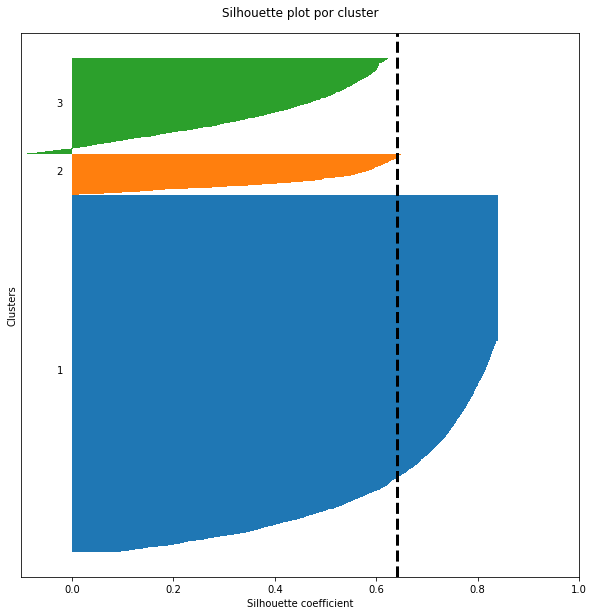

In [149]:
plt.rcParams['figure.figsize'] = (10,10)
rr = plt.axes()
# Silhouette plot
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels)):
    cluster_silhouette_vals = silhouette_vals[labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    rr.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=2)
    rr.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
    y_lower += len(cluster_silhouette_vals)

avg_score = np.mean(silhouette_vals)
rr.axvline(avg_score, linestyle='--', linewidth=3, color='black')
rr.set_yticks([])
rr.set_xlim([-0.1, 1])
rr.set_xlabel('Silhouette coefficient')
rr.set_ylabel('Clusters')
rr.set_title('Silhouette plot por cluster', y=1.02)

In [150]:
data.loc[data.kmeans == 0].describe()


,cancellations_rate,claims_rate,delayed_handling_time_rate,kmeans
count,5021.000000,5021.000000,5021.000000,5021.0
mean,0.001364,0.003289,0.005154,0.0
std,0.003148,0.004754,0.006782,0.0
min,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.001500,0.0
75%,0.000900,0.006000,0.008700,0.0
max,0.034000,0.032200,0.024700,0.0


In [151]:
data.loc[data.kmeans == 1].describe()


,cancellations_rate,claims_rate,delayed_handling_time_rate,kmeans
count,581.000000,581.000000,581.000000,581.0
mean,0.003365,0.006669,0.106131,1.0
std,0.005866,0.007697,0.026322,0.0
min,0.000000,0.000000,0.074800,1.0
25%,0.000000,0.000000,0.085600,1.0
50%,0.000000,0.004600,0.100400,1.0
75%,0.005500,0.012400,0.121400,1.0
max,0.038400,0.038700,0.333300,1.0


In [152]:
data.loc[data.kmeans == 2].describe()


,cancellations_rate,claims_rate,delayed_handling_time_rate,kmeans
count,1345.000000,1345.000000,1345.000000,1345.0
mean,0.003450,0.006860,0.043271,2.0
std,0.014383,0.014848,0.014143,0.0
min,0.000000,0.000000,0.000000,2.0
25%,0.000000,0.000000,0.031200,2.0
50%,0.000000,0.005800,0.040500,2.0
75%,0.005000,0.011300,0.053100,2.0
max,0.500000,0.500000,0.074600,2.0


**4. RECOMENDACIONES**

Se puede aumentar la muestra de estudio además de incluir más variables que ayuden a tomar mejores decisiones de clasificación.

Los resultados obtenidos pueden ser base para futuros modelos de clasificación al tener una etiqueta previa.

